# BCG X

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [57]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

Checking for the number of rows and columns(features) of each dataframe.

In [133]:
client_df.shape

(14606, 26)

In [134]:
price_df.shape

(193002, 8)

Examining the first and last 5 rows of each dataframe.

In [95]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


The client data includes a mix of numerrical, categorical, and date-time variables, which will need to be transformed before modeling later. Moreover, 'channel_sales' column has 'MISSING' as a value and some columns have a many zeroes.

In [96]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


The price dataframe includes date-time and numerical data. We can observe a lot of zeroes.

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that we're dealing with along with the data types of each column. The data types may dictate how we transform and engineer features.

To get an overview of the data types within a data frame, we can use the `info()` method.

In [76]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [77]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


We can see that all datetime-related columns are currently stored as objects and not in `datetime` format; they will need to be converted later.

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [78]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


Based on the information provided, we can see that the data is significantly skewed, as the means are greater than their medians

In [79]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


The price data has a relatively symmetrical distribution. It exhibits a right skew due to the presence of outliers.

---
## Handling missing data

Check if there are any N/A values in any of the columns

In [80]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [81]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

Check for any duplicates

In [82]:
client_df.iloc[:, 0].unique

<bound method Series.unique of 0        24011ae4ebbe3035111d65fa7c15bc57
1        d29c2c54acc38ff3c0614d0a653813dd
2        764c75f661154dac3a6c254cd082ea7d
3        bba03439a292a1e166f80264c16191cb
4        149d57cf92fc41cf94415803a877cb4b
                       ...               
14601    18463073fb097fc0ac5d3e040f356987
14602    d0a6f71671571ed83b2645d23af6de00
14603    10e6828ddd62cbcf687cb74928c4c2d2
14604    1cf20fd6206d7678d5bcafd28c53b4db
14605    563dde550fd624d7352f3de77c0cdfcd
Name: id, Length: 14606, dtype: object>

No duplicates

In [83]:
# merging the datasets

merged_df = pd.merge(client_df, price_df, on='id')
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


---

## Data visualization

In [97]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectangles/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### Churn

The first function `plot_stacked_bars` is used to plot a stacked bar chart.

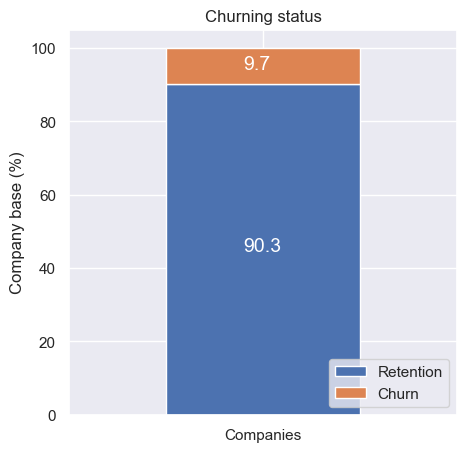

In [85]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 10% of the total customers have churned.

### Sales Channel

In [86]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100)
channel_churn = channel_churn.sort_values(by=1, ascending=False)
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


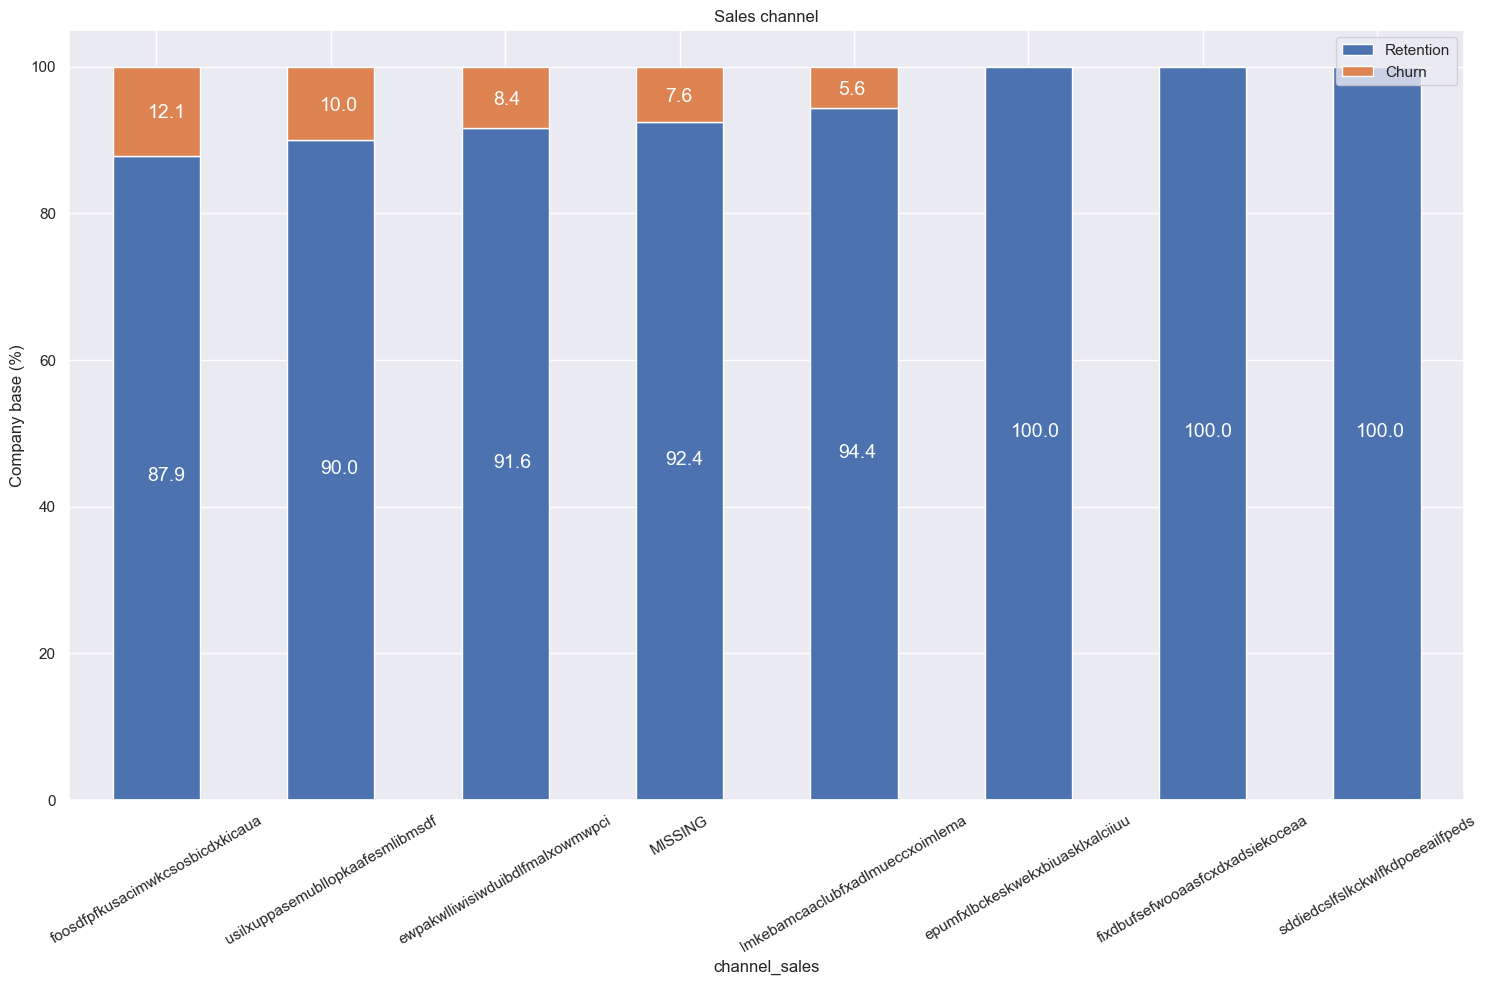

In [87]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

There are five sales channels where customers have churned. This could be an important feature for building our model.

### Consumption

The function `plot_distribution` helps to plot the distribution of a numeric column.

In [110]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

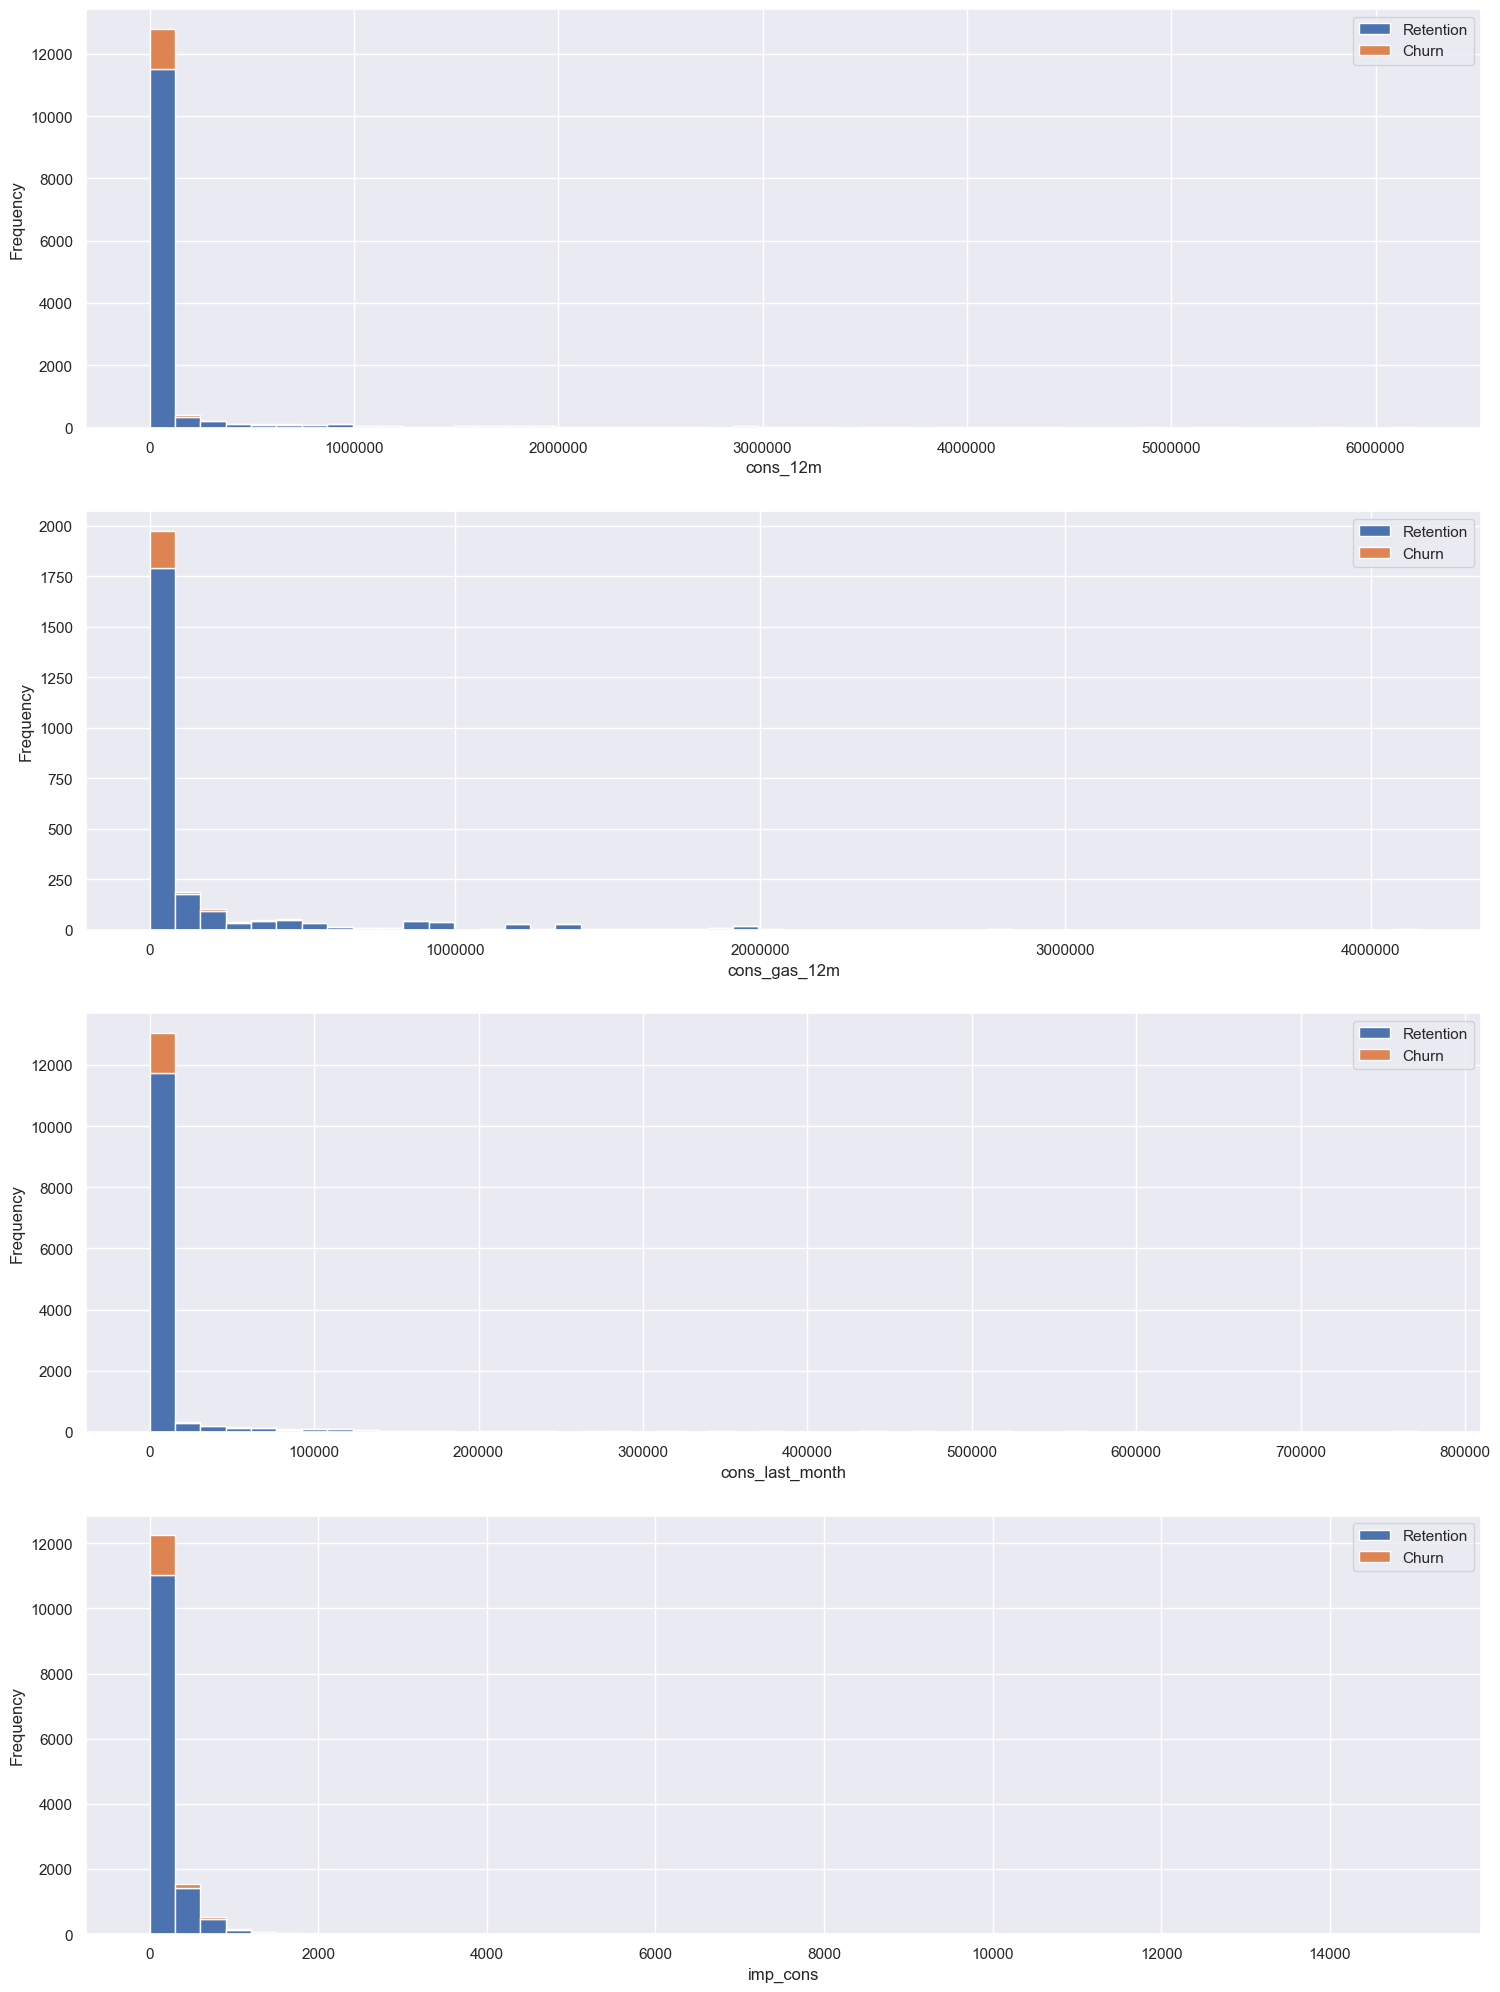

In [111]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

plt.show() 

The consumption data is highly skewed to the right. This is proven by the descriptive statistics we gathered earlier. These outliers will need to be dealt with later.

### Contract Type

In [112]:
contract_type =client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

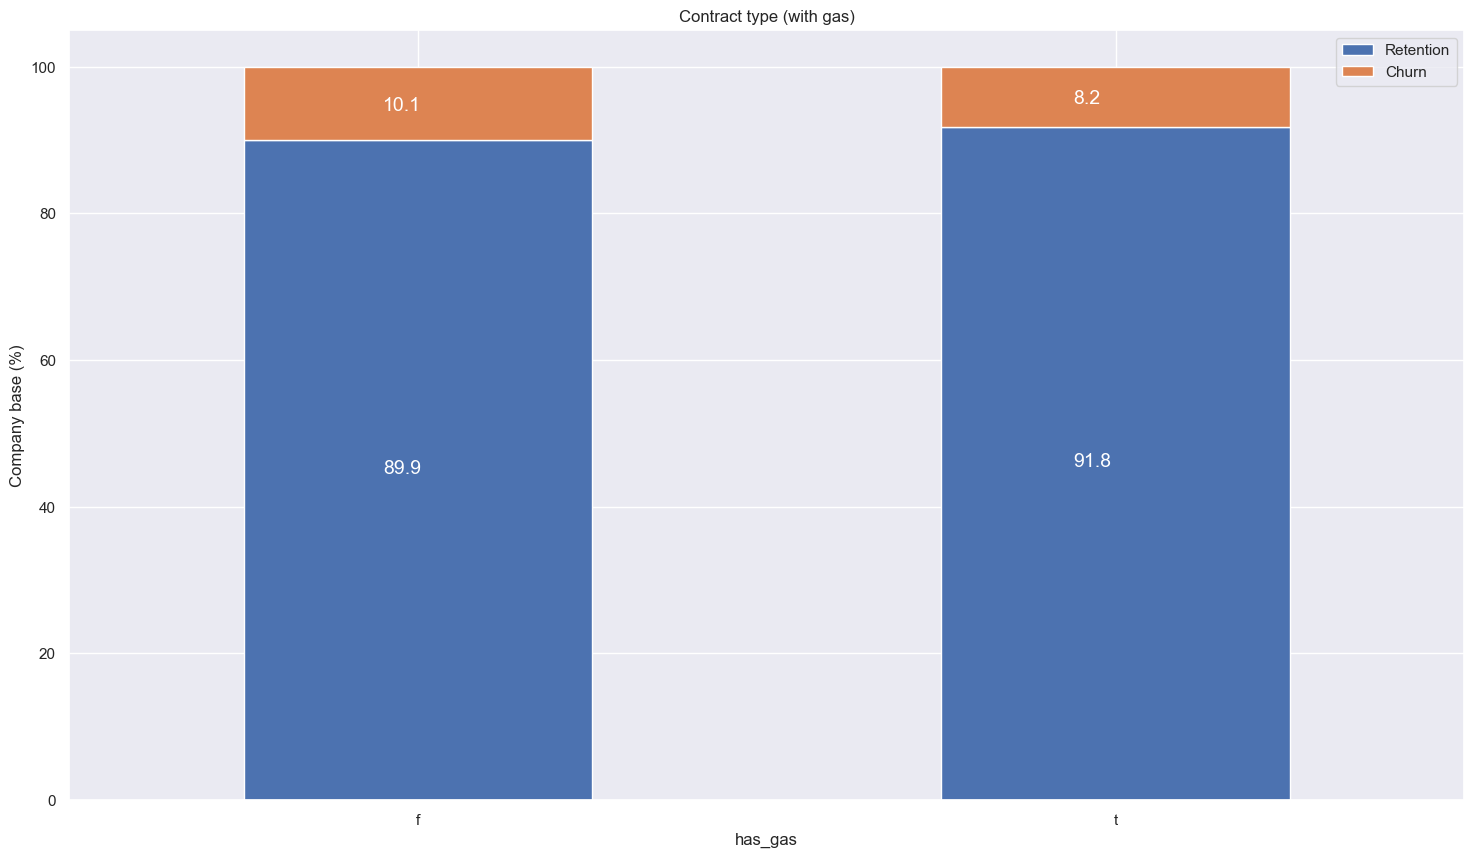

In [114]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas)')

Both contract types seem to have a similar percentages of customer who have churned. With `no gas` type having higher churn rates.

### Margins

In [135]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

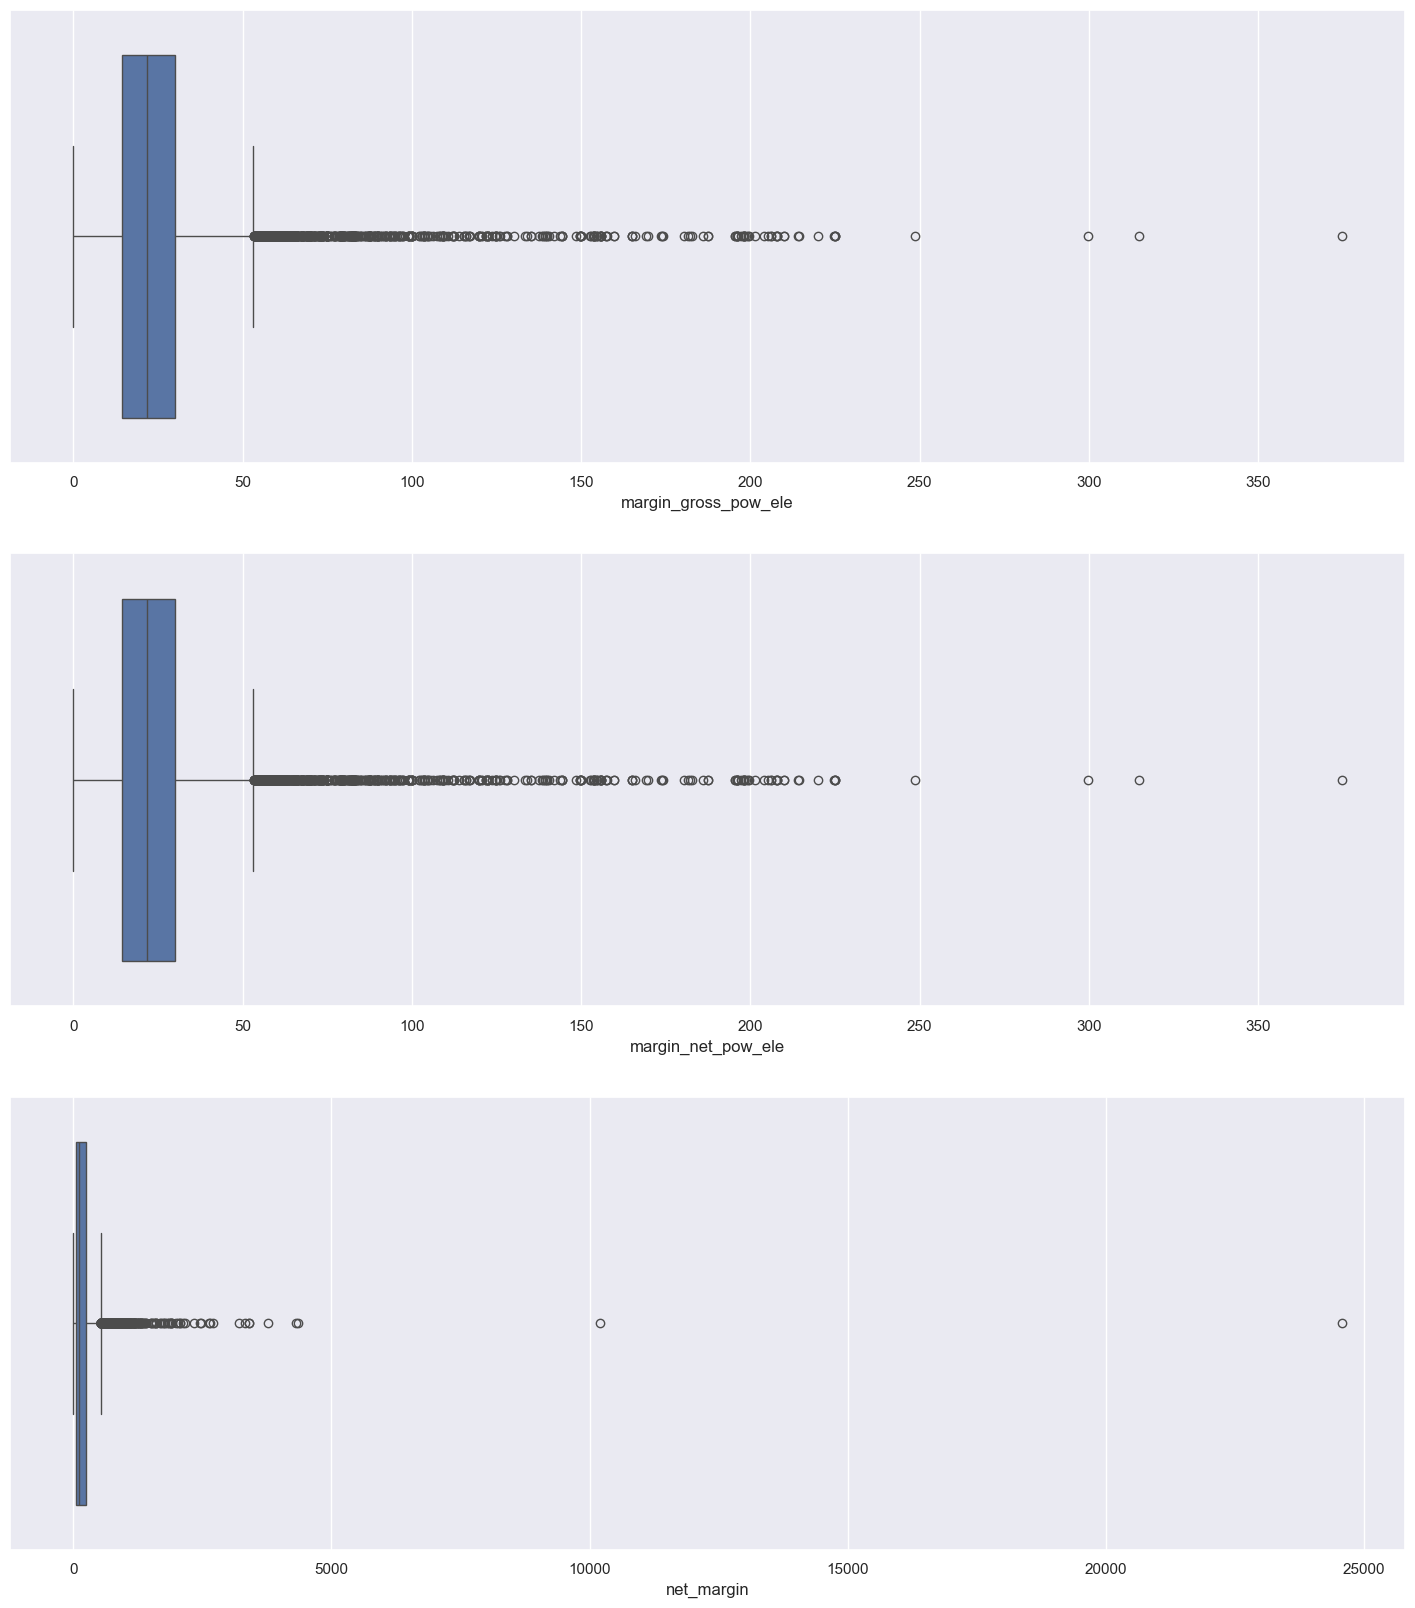

In [136]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0], orient='h')
sns.boxplot(x=margin["margin_net_pow_ele"], ax=axs[1], orient='h')
sns.boxplot(x=margin["net_margin"], ax=axs[2], orient='h')
plt.show()

Margins data is also right skewed.

### Subscribed power

In [149]:
power = client_df[['id', 'pow_max', 'churn']]

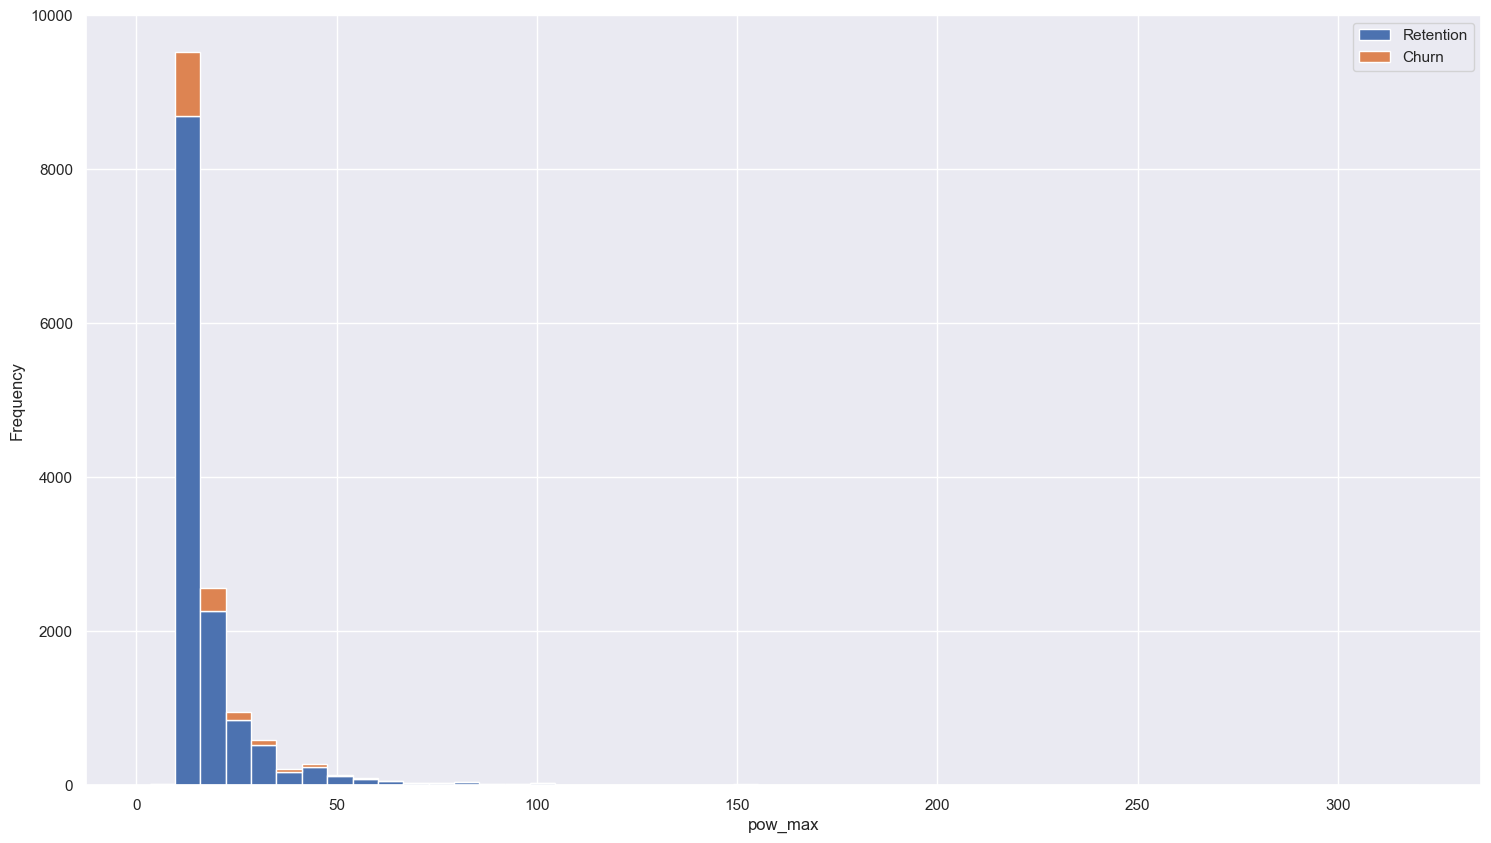

In [150]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)
plt.show()  

### Other columns

In [140]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

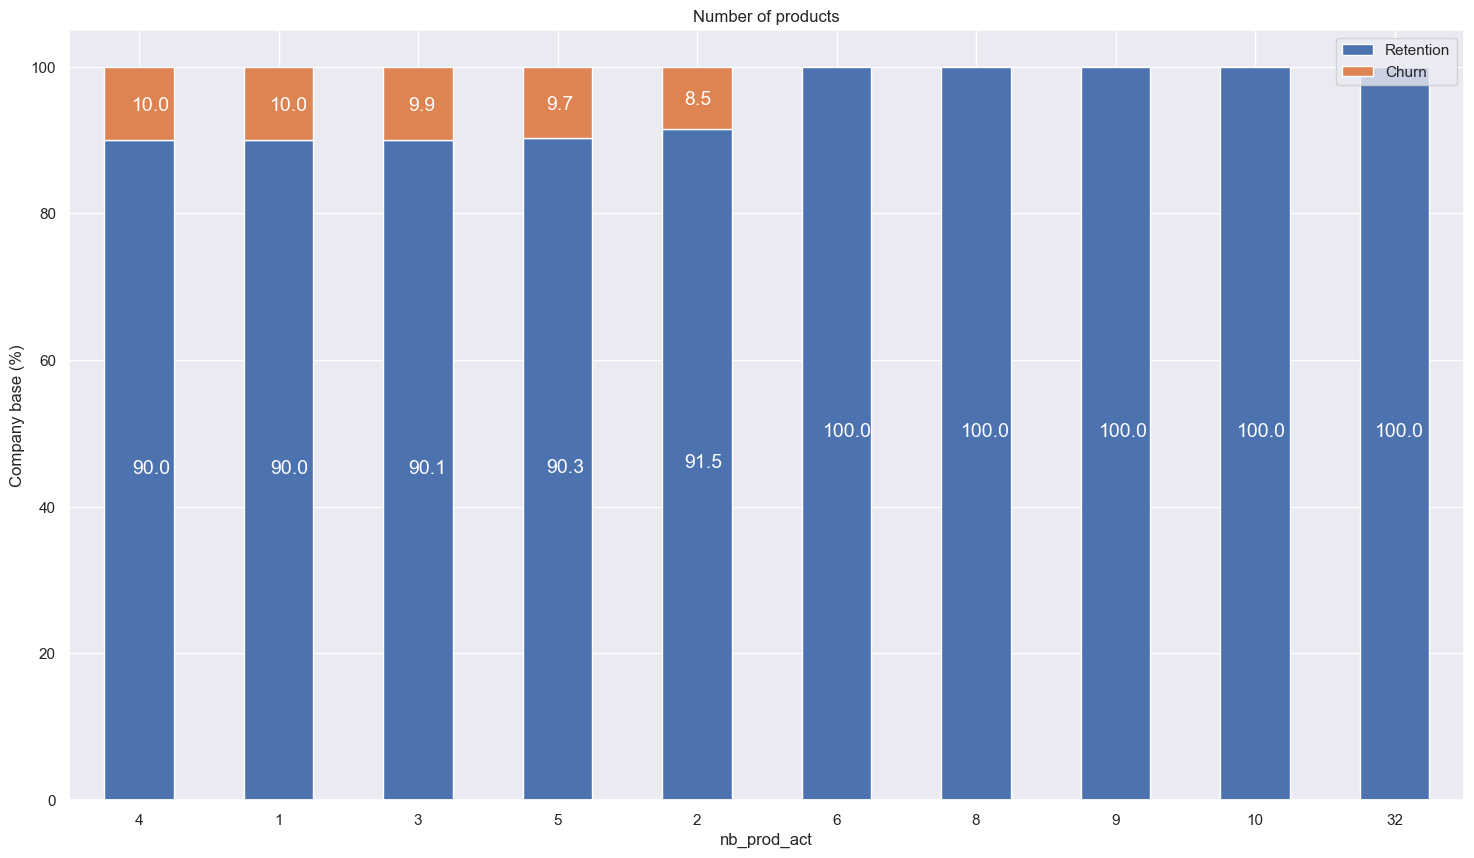

In [141]:
plot_stacked_bars(products_percentage, "Number of products")

Companies with 6+ active products have not churned.

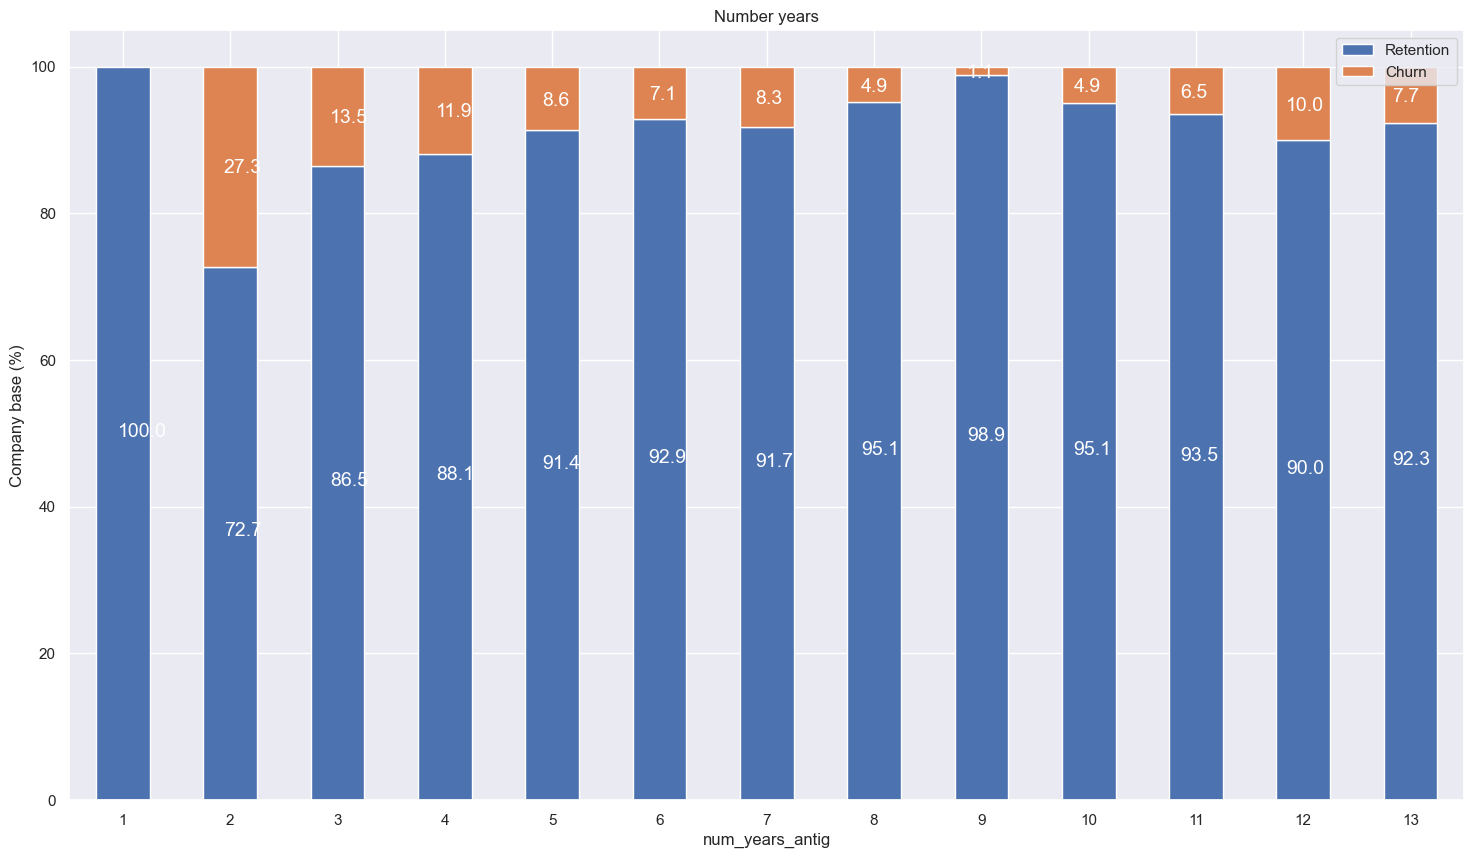

In [146]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

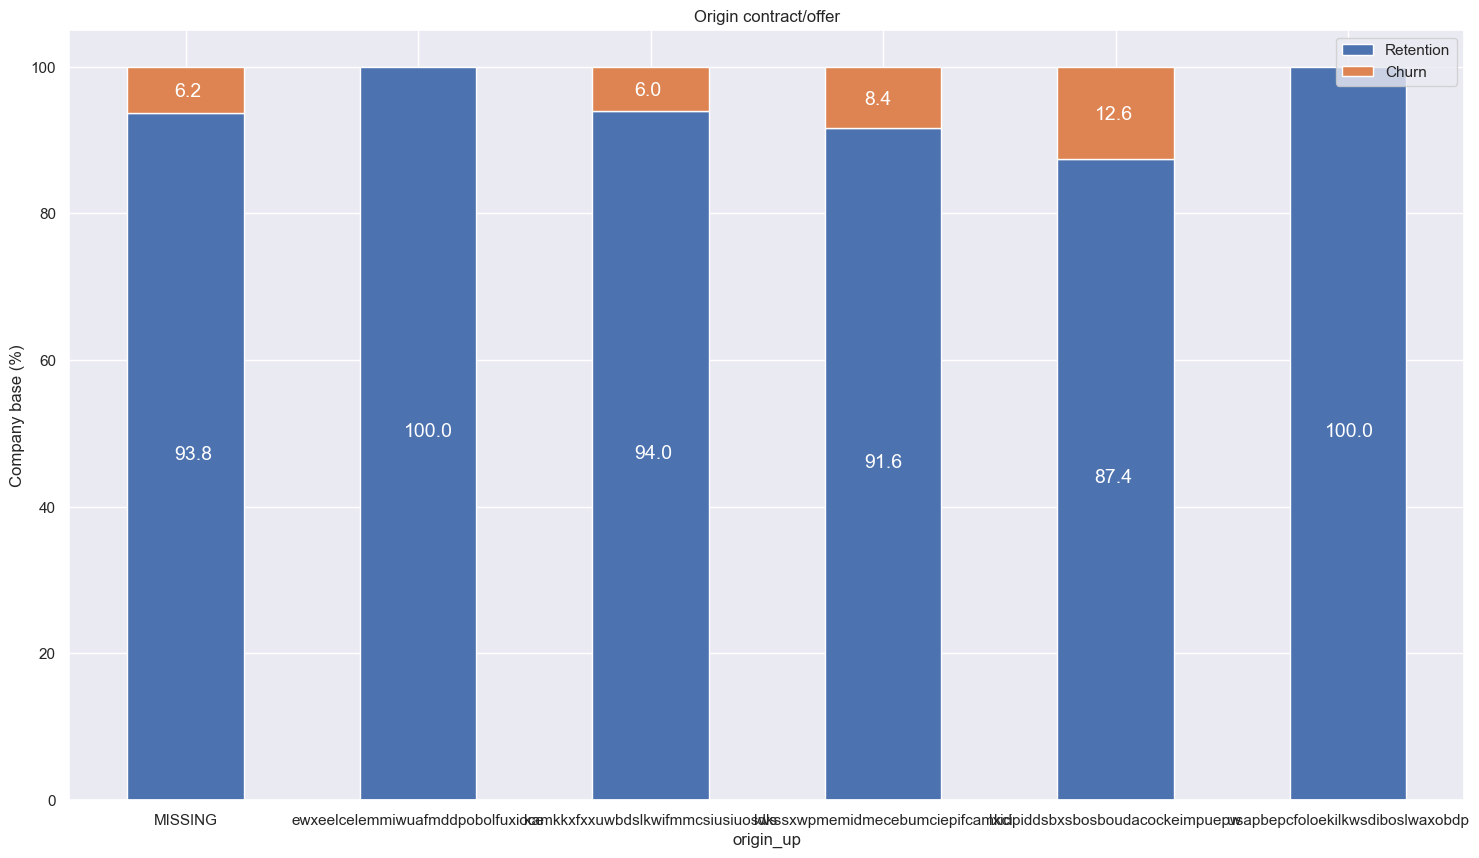

In [151]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## Data Cleaning

In [58]:
df = pd.read_csv('./clean_data_after_eda.csv')

df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [4]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [59]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


## Feature Engineering

### Difference between off-peak prices in December and preceding January

In [10]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# # Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


### Difference between peak prices in December and preceding January

In [18]:
# Group peak prices by companies and month
monthly_peak_prices_by_id = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_peak_prices = monthly_peak_prices_by_id.groupby('id').first().reset_index()
dec_peak_prices = monthly_peak_prices_by_id.groupby('id').last().reset_index()

# # Calculate the difference
peak_diff = pd.merge(dec_peak_prices.rename(columns={'price_peak_var': 'dec_1', 'price_peak_fix': 'dec_2'}), jan_peak_prices.drop(columns='price_date'), on='id')
peak_diff['peak_diff_dec_january_energy'] = peak_diff['dec_1'] - peak_diff['price_peak_var']
peak_diff['peak_diff_dec_january_power'] = peak_diff['dec_2'] - peak_diff['price_peak_fix']
peak_diff = peak_diff[['id', 'peak_diff_dec_january_energy','peak_diff_dec_january_power']]

peak_diff.head()

,id,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


### Capture changes in seasonal demand

In [63]:
price_fe = price_df.copy()

price_fe['month'] = pd.to_datetime(price_fe['price_date']).dt.month
price_fe['quarter'] = price_fe['price_date'].dt.quarter
price_fe = price_fe.drop(columns='price_date')

price_fe[price_fe['id'] == '0002203ffbb812588b632b9e628cc38d']

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month,quarter
72163,0002203ffbb812588b632b9e628cc38d,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,1,1
72164,0002203ffbb812588b632b9e628cc38d,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,2,1
72165,0002203ffbb812588b632b9e628cc38d,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,3,1
72166,0002203ffbb812588b632b9e628cc38d,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,4,2
72167,0002203ffbb812588b632b9e628cc38d,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,5,2
72168,0002203ffbb812588b632b9e628cc38d,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,6,2
72169,0002203ffbb812588b632b9e628cc38d,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,7,3
72170,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,8,3
72171,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,9,3
72172,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,10,4


In [78]:
prices = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

monthly_means = price_fe.groupby(['quarter'])[prices].mean().reset_index()
monthly_means

,quarter,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,1,0.142813,0.055041,0.030365,43.239613,10.670375,6.444999
1,2,0.143508,0.055550,0.030262,43.317053,10.555150,6.365079
2,3,0.139849,0.054169,0.030653,43.354086,10.635639,6.414929
3,4,0.137940,0.053763,0.030703,43.427070,10.630346,6.414939


### Difference between fixed and variable prices

In [76]:
price_fe['peak_to_off_peak_ratio'] = price_fe['price_peak_var'] / price_fe['price_off_peak_var']
price_fe['fixed_to_variable_peak'] = price_fe['price_peak_fix'] - price_fe['price_peak_var']
price_fe

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month,quarter,peak_to_off_peak_ratio,fixed_to_variable_peak
0,038af19179925da21a25619c5a24b745,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,1,1,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,2,1,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,3,1,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,4,2,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,5,2,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,8,3,0.85253,24.335098
192998,16f51cdc2baa19af0b940ee1b3dd17d5,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,9,3,0.85253,24.335098
192999,16f51cdc2baa19af0b940ee1b3dd17d5,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,10,4,0.85253,24.335098
193000,16f51cdc2baa19af0b940ee1b3dd17d5,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,11,4,0.85253,24.335098


### Average price changes between periods

In [85]:
# Calculate price changes between periods for variable prices
price_fe['change_var_peak_offpeak'] = price_fe['price_peak_var'] - price_fe['price_off_peak_var']
price_fe['change_var_midpeak_peak'] = price_fe['price_mid_peak_var'] - price_fe['price_peak_var']
price_fe['change_var_offpeak_midpeak'] = price_fe['price_off_peak_var'] - price_fe['price_mid_peak_var']

# Calculate price changes between periods for fixed prices
price_fe['change_fix_peak_offpeak'] = price_fe['price_peak_fix'] - price_fe['price_off_peak_fix']
price_fe['change_fix_midpeak_peak'] = price_fe['price_mid_peak_fix'] - price_fe['price_peak_fix']
price_fe['change_fix_offpeak_midpeak'] = price_fe['price_off_peak_fix'] - price_fe['price_mid_peak_fix']


In [86]:
# Calculate average price change across periods by company
average_price_changes = price_fe.groupby('id').agg({
    'change_var_peak_offpeak': 'mean',
    'change_var_midpeak_peak': 'mean',
    'change_var_offpeak_midpeak': 'mean',
    'change_fix_peak_offpeak': 'mean',
    'change_fix_midpeak_peak': 'mean',
    'change_fix_offpeak_midpeak': 'mean'
}).reset_index()

average_price_changes.head()

,id,change_var_peak_offpeak,change_var_midpeak_peak,change_var_offpeak_midpeak,change_fix_peak_offpeak,change_fix_midpeak_peak,change_fix_offpeak_midpeak
0,0002203ffbb812588b632b9e628cc38d,-0.020545,-0.030633,0.051178,-16.280694,-8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,-0.146426,0.000000,0.146426,-44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,-0.181558,0.000000,0.181558,-45.319710,0.000000,45.319710
3,0010ee3855fdea87602a5b7aba8e42de,-0.020465,-0.029260,0.049725,-16.258972,-8.129484,24.388456
4,00114d74e963e47177db89bc70108537,-0.147926,0.000000,0.147926,-44.266930,0.000000,44.266930
